In [20]:
import cv2
import numpy as np


class procesadorImagen:
    def __init__(self, ruta_imagen):
        self.img_original=self.cargar_imagen(ruta_imagen)
        self.img_umbrelizada= None
    
    def cargar_imagen(self, ruta):
        return cv2.imread(ruta)

    def imagen_gris(self, imagen):
        gray=cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
        ancho_ventana= 400
        alto_ventana= 400
        cv2.namedWindow("Imagen de célula", cv2.WINDOW_NORMAL)
        cv2.resizeWindow("Imagen de célula", ancho_ventana, alto_ventana)
        cv2.imshow("Imagen en escala gris", gray)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
        
    #Filtrado y eliminación de ruido
    def suavizado_gaussiano(self, imagen_gris): # Mostrar la imagen filtrada
        imagen_filtrada = cv2.GaussianBlur(imagen_gris, (3, 3), 0) # Aplicar un filtro Gaussiano para reducir ruido
        mid=np.mean(imagen_gris)                                    #para tomar un promedio de los colores 
        _, thresholded= cv2.threshold(imagen_filtrada,mid,255,cv2.THRESH_BINARY)
        cv2.imshow('Imagen Filtrada', imagen_filtrada)
        cv2.imshow("Imagen umbralizada", thresholded)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
        return thresholded

    def transformacion(self, img_umbralizada):
        kernel=cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (20,20))
        erosion=cv2.erode(img_umbralizada, kernel, iterations=1)
        dilatacion=cv2.dilate(erosion, kernel, iterations=1)   #Realizar opening, útil para eliminar objetos pequeños
        cv2.imshow("Imágen erosionada y dilatada", dilatacion)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
        return dilatacion
    
    def filtrado_contornos(self, img_transformada):          #Aquí se devuelve el valor de contornos encontrados, se utiliza ,_ ya que no necesitamos valores de jerarquía
        contours, _=cv2.findContours(img_transformada,cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        contornos=[]
        for i in contours:
            area=cv2.contourArea(i)
            if area>2500:
                contornos.append(i)
        numero_celulas=len(contornos)
        return numero_celulas
        
    

In [26]:
ruta_imagen = r"C:\Users\sslga\OneDrive\Documentos\Taller3InfoII\celula.jpg"
procesador = procesadorImagen(ruta_imagen)
imagen_gris = cv2.cvtColor(procesador.img_original, cv2.COLOR_BGR2GRAY)
procesador.imagen_gris(procesador.img_original)
img_umbralizada=procesador.suavizado_gaussiano(imagen_gris)
img_transformada=procesador.transformacion(img_umbralizada)
procesador.filtrado_contornos(img_transformada)


26

PUNTO 2.

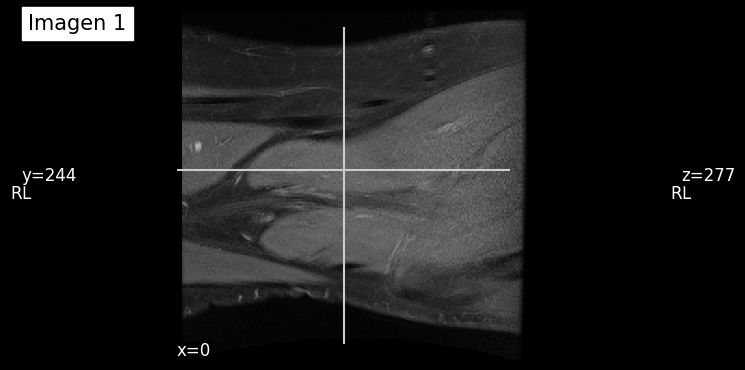

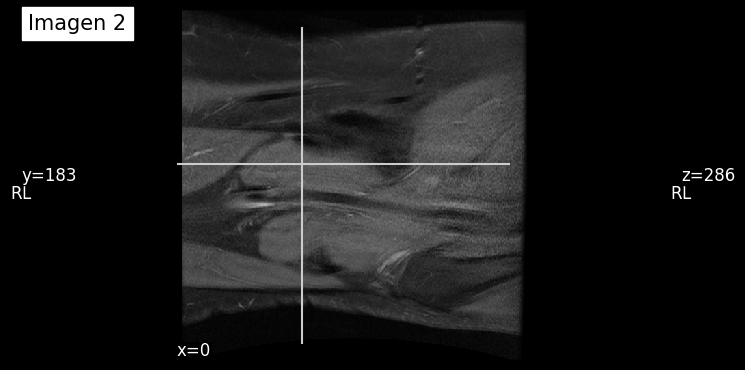

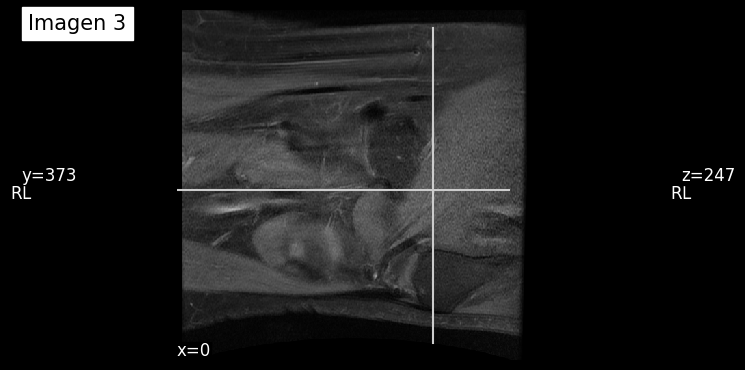

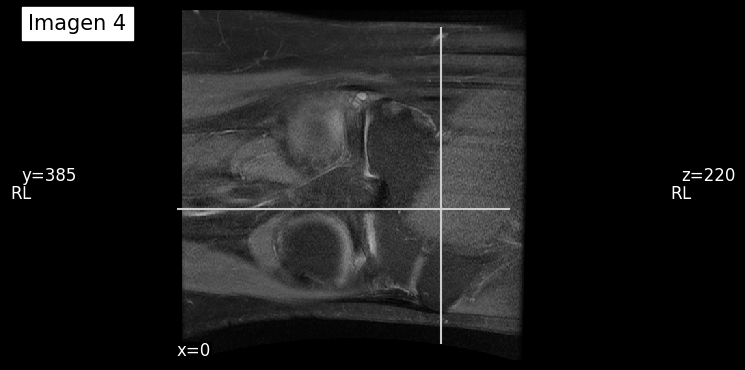

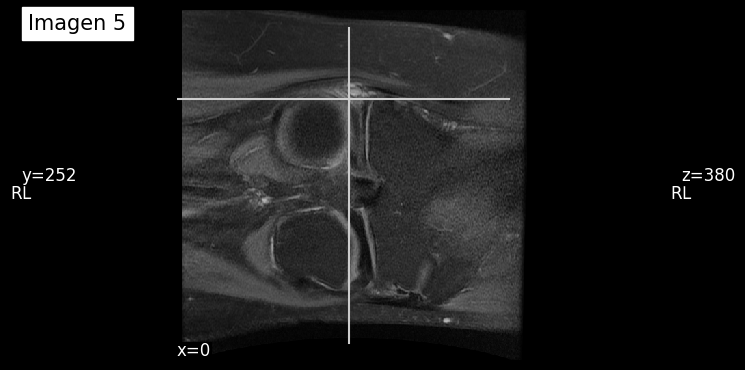

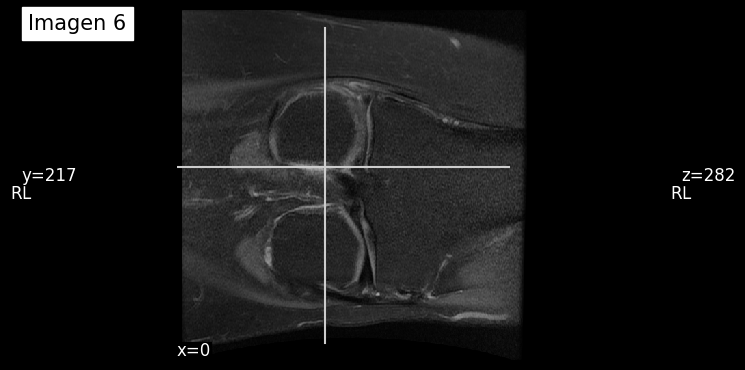

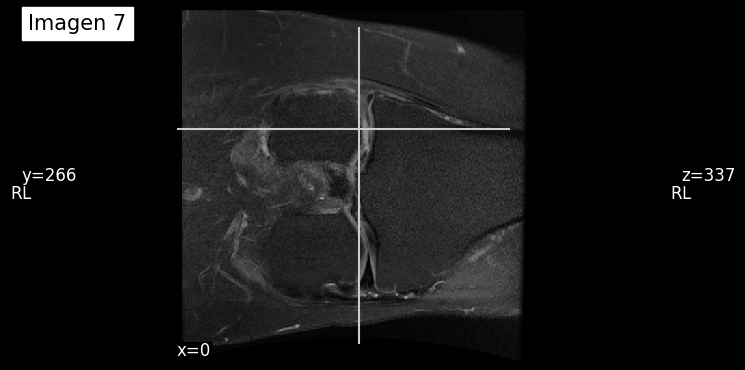

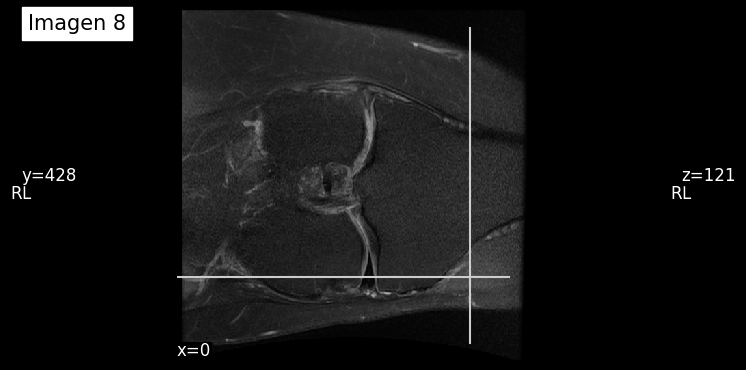

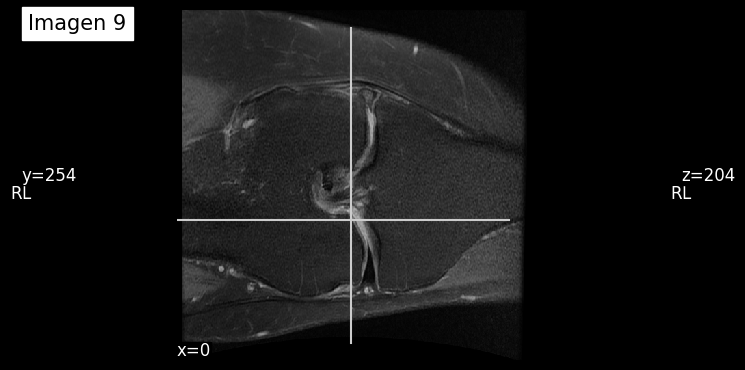

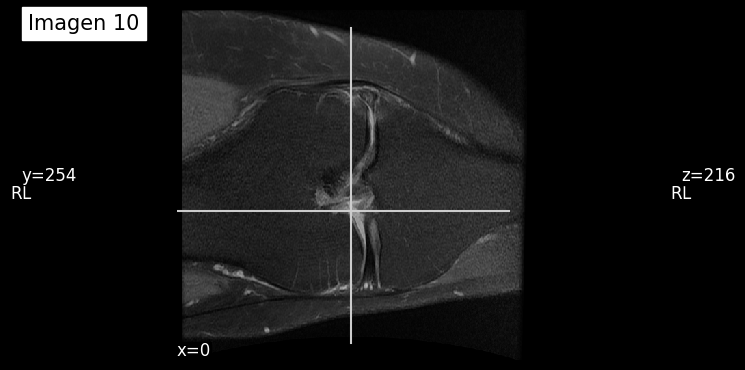

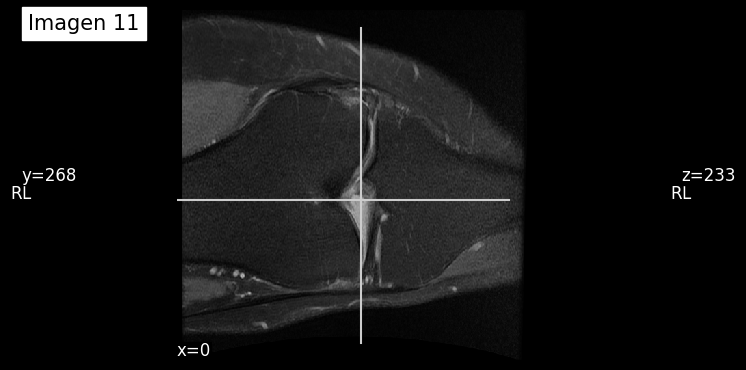

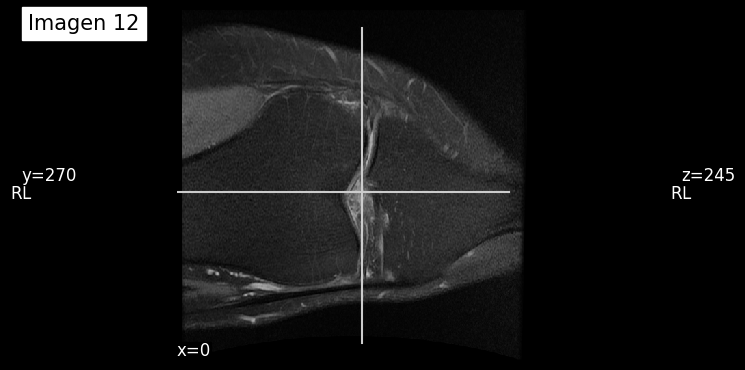

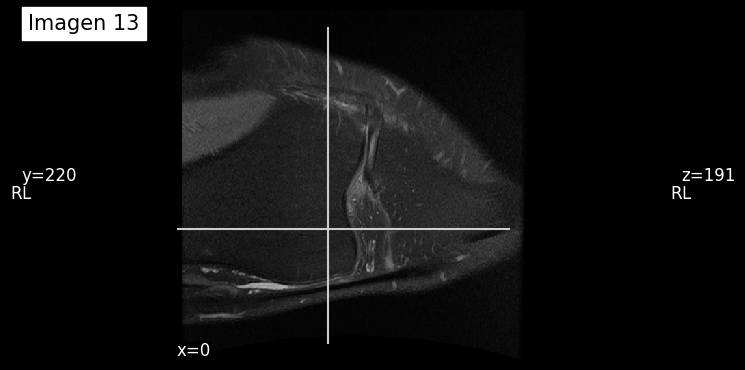

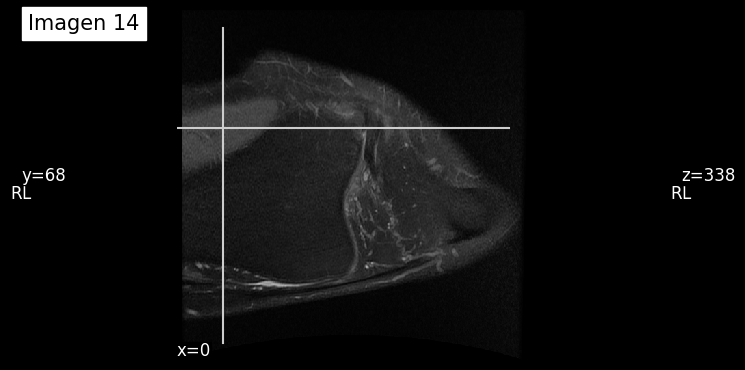

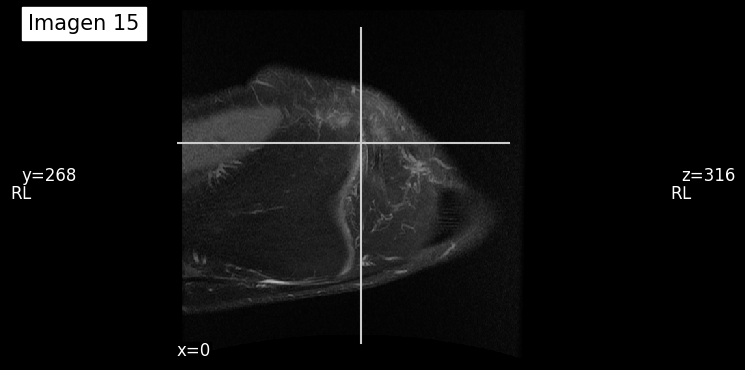

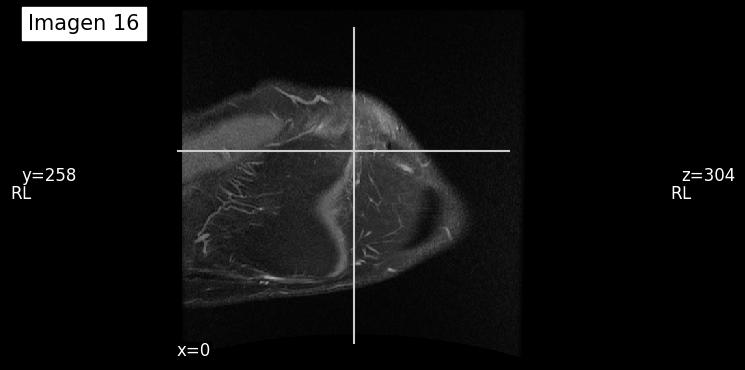

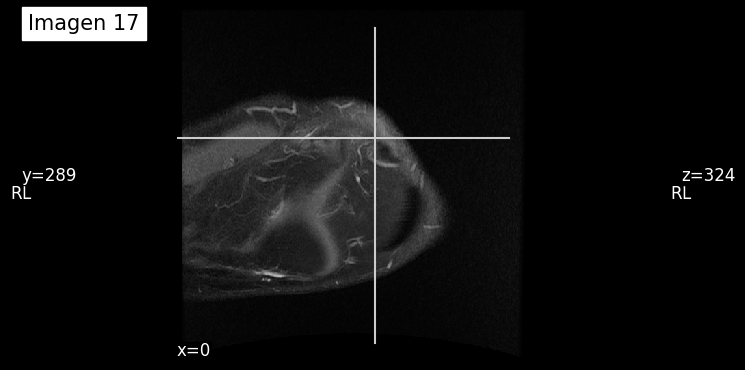

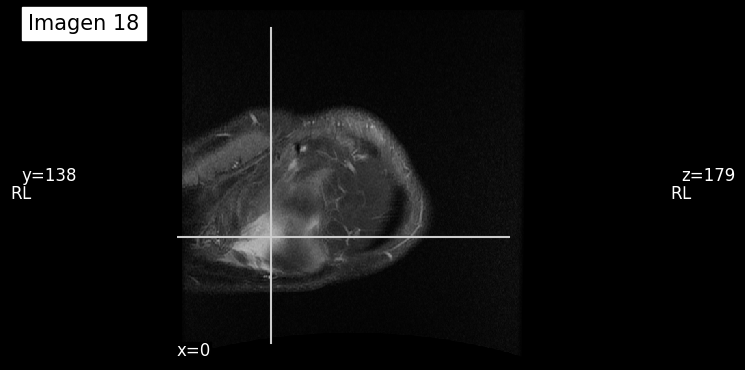

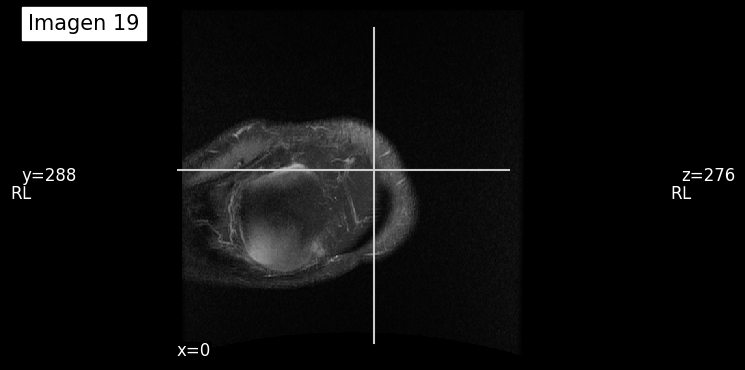

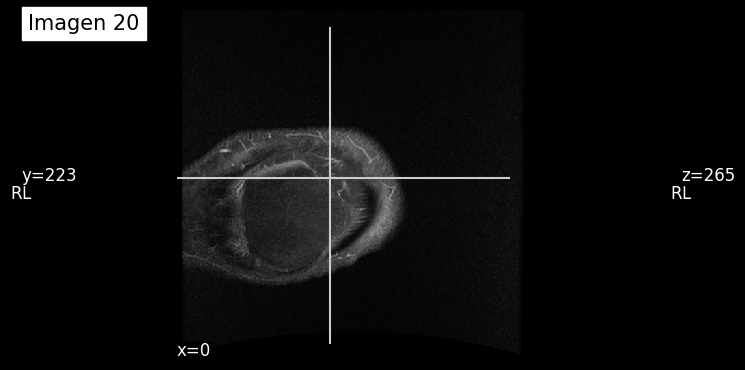

In [19]:
import os
import pydicom
import numpy as np
import nibabel as nib
from nilearn import plotting

carpeta = r"C:\Users\sslga\OneDrive\Documentos\Taller3InfoII\archivosDCM"
imagenes = []

for i in sorted(os.listdir(carpeta)):
    if i.endswith(".dcm"):
        path_imagen= os.path.join(carpeta, i)
        imagen_dicom= pydicom.dcmread(path_imagen)
        imagen_3d= np.expand_dims(imagen_dicom.pixel_array, axis=0)
        imagen_nib= nib.Nifti1Image(imagen_3d, np.eye(4))  #Se usa una matriz de identidad para que no haya cambio en su posición y orientación
        imagenes.append(imagen_nib)

for posicion, imagen in enumerate(imagenes, start=1):
    plotting.plot_anat(imagen, title=f"Imagen {posicion}")
    plotting.show()